# Titanic Dataset Analysis (Kaggle)
**Objective:** Explore the Titanic dataset, clean the data, visualize key patterns, and understand survival trends.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots look better
sns.set(style="whitegrid")

In [53]:
## Kaggle API & Dataset Download
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Download Titanic dataset
# !kaggle datasets download -d heptapod/titanic
# !unzip titanic.zip

In [54]:
# Create kaggle folder & move json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [55]:
# List datasets matching "titanic"
!kaggle datasets list -s "titanic" --max 5

# Download Titanic dataset
!kaggle datasets download -d heptapod/titanic

# Unzip dataset
!unzip titanic.zip

ref                                 title                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------  ------------------------  ----------  --------------------------  -------------  ---------  ---------------  
asmaashawkey/titanic                titanic                            0  2024-04-09 15:46:02.553000            335          5  0.3529412        
kashish50/titanic-ml-from-disaster  Titanic-ML from Disaster           0  2024-04-10 02:57:26.480000             14         17  0.29411766       
Dataset URL: https://www.kaggle.com/datasets/heptapod/titanic
License(s): DbCL-1.0
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace train_and_test2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [56]:
## Load Dataset
df = pd.read_csv("train_and_test2.csv")  # or your downloaded file
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0


In [57]:
## Data Cleaning
# Keep only relevant columns
cols_to_keep = ['Passengerid','Age','Fare','Sex','sibsp','Parch','Pclass','Embarked','2urvived']
df_clean = df[cols_to_keep].rename(columns={'2urvived':'Survived'})

# Map 0 -> Not Survived, 1 -> Survived
df_clean['Survived_label'] = df_clean['Survived'].map({0:'Not Survived', 1:'Survived'})
# Map 0 -> Male, 1 -> Female
df_clean['Sex_label'] = df_clean['Sex'].map({0:'Male', 1:'Female'})

df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Passengerid     1309 non-null   int64  
 1   Age             1309 non-null   float64
 2   Fare            1309 non-null   float64
 3   Sex             1309 non-null   int64  
 4   sibsp           1309 non-null   int64  
 5   Parch           1309 non-null   int64  
 6   Pclass          1309 non-null   int64  
 7   Embarked        1307 non-null   float64
 8   Survived        1309 non-null   int64  
 9   Survived_label  1309 non-null   object 
 10  Sex_label       1309 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 112.6+ KB


,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1307.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.385027,2.294882,1.492731,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.865560,0.837836,0.814626,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,9.000000,3.000000,2.000000,1.000000


## Data Analysis / Visualization

/tmp/ipython-input-1667053852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived_label', data=df_clean, palette="Set2")


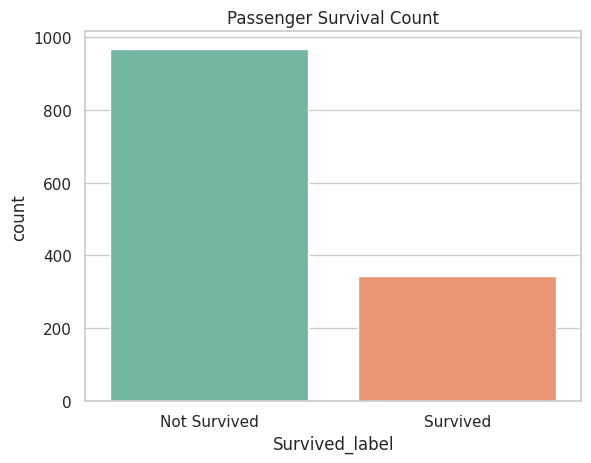

Survival Rate (%):
 Survived
0    73.873186
1    26.126814
Name: proportion, dtype: float64


In [58]:
## Survival Count
sns.countplot(x='Survived_label', data=df_clean, palette="Set2")
plt.title("Passenger Survival Count")
plt.show()

survival_rate = df_clean['Survived'].value_counts(normalize=True) * 100
print("Survival Rate (%):\n", survival_rate)

Observation: Most passengers did not survive (~74%).

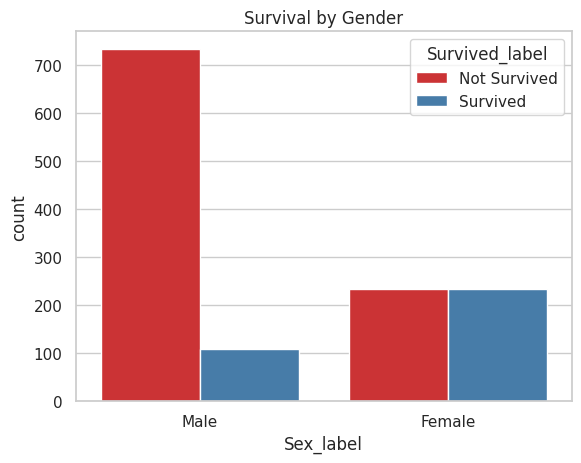

In [59]:
## Survival by Gender
sns.countplot(x='Sex_label', hue='Survived_label', data=df_clean, palette="Set1")
plt.title("Survival by Gender")
plt.show()

Females had higher survival rates than males.

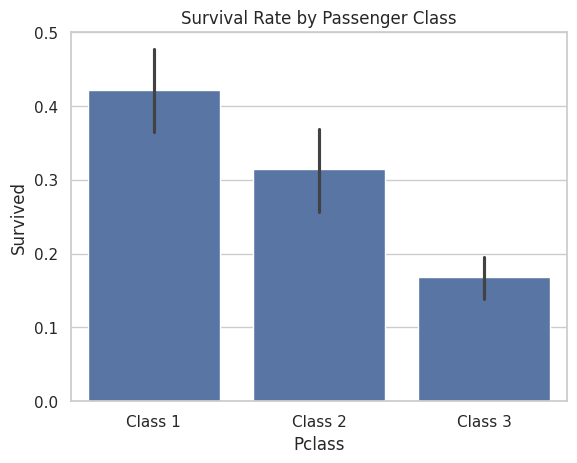

In [60]:
## Survival by Class
sns.barplot(x='Pclass', y='Survived', data=df_clean)
plt.title("Survival Rate by Passenger Class")
plt.xticks([0,1,2], ['Class 1', 'Class 2', 'Class 3'])
plt.show()

Observation: Class 1 passengers survived more than Class 3.

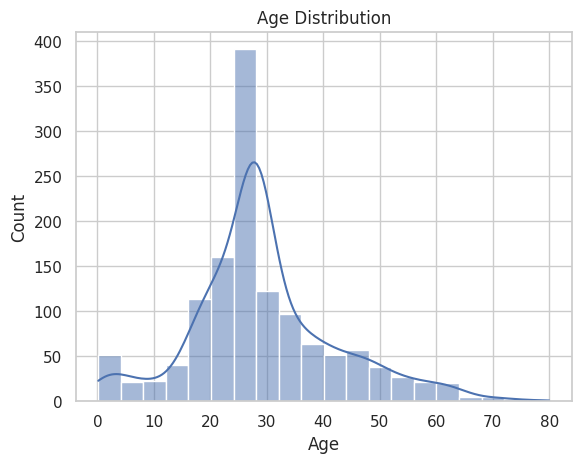

In [61]:
## Age Distribution
sns.histplot(df_clean['Age'].dropna(), bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

Most passengers were aged 20-30.

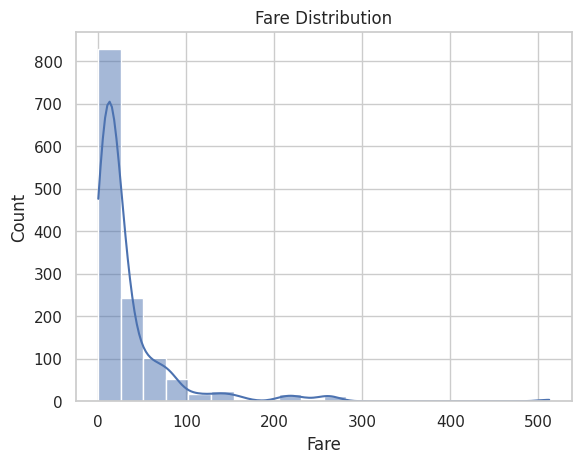

In [62]:
## Fare Distribution
sns.histplot(df_clean['Fare'].dropna(), bins=20, kde=True)
plt.title("Fare Distribution")
plt.show()

Higher fares mostly correspond to Class 1 passengers.

In [63]:
## Save Cleaned Dataset & Summary
df_clean.to_csv("titanic_clean.csv", index=False)
df_clean.describe().to_csv("titanic_summary.csv")

## Conclusion
- Overall survival rate: ~26%.
- Females had higher survival than males.
- Class 1 passengers had higher survival than Class 3.
- Most passengers were aged 20-30; fare distribution aligns with passenger class.
- Future work: Predict survival using machine learning models.